This notebook is created to show how we find the members of praesepe star cluster based on Gaia Early Data Release3.

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gaia-edr3/Gaia_eDR3_Praesepe.fits


In [2]:
sns.set_style('darkgrid')

#  Chaper 1: Know your data

Step 1:  
read the Gaia Early Data Release3 into python

In [3]:
file_path="../input/gaia-edr3/Gaia_eDR3_Praesepe.fits"
data=Table.read(file_path,format="fits")

Step2:  
Plot the data out. I use the 2D position data of the stars, which are in the RA_ICRS and DE_ICRS columns in the table. The Daia_eDR3_Praesepe.fits should contain a 5-degree radius center, since the members of praesepe star should have same pace location.


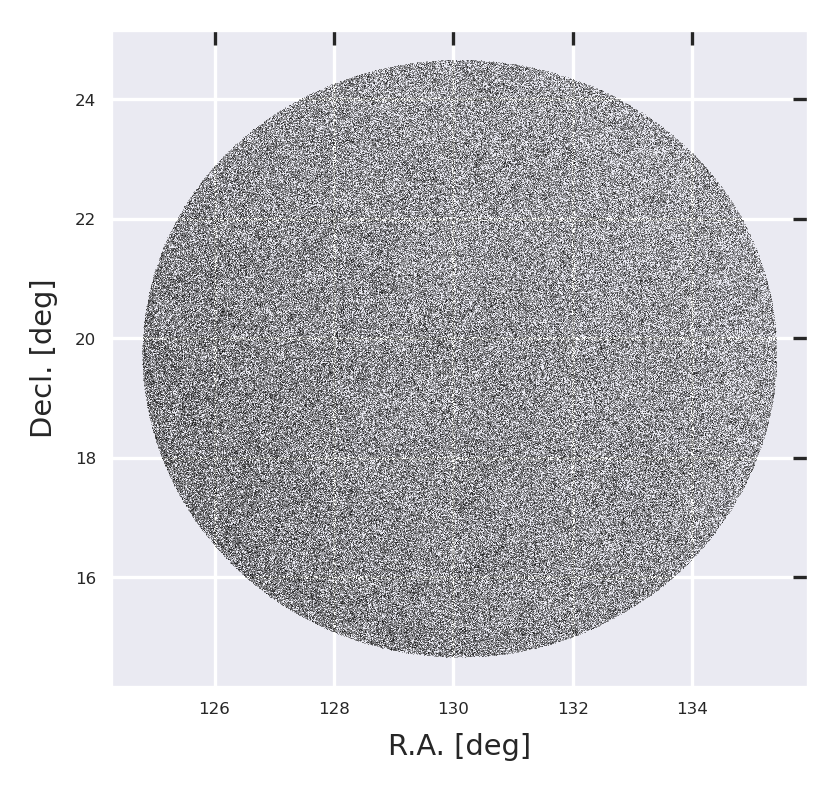

In [4]:
f=plt.figure(facecolor='white',figsize=(3,3),dpi=300)
ax1=plt.subplot(111,aspect=1)
ax1.plot(data['RA_ICRS'],data['DE_ICRS'],'.',c='k',ms=.1,mew=.1)
ax1.tick_params(axis='both',which='both',labelsize=4,right=True,top=True,direction='in')

ax1.set_xlabel('R.A. [deg]',size='x-small',style='normal',family='sans-serif')
ax1.set_ylabel('Decl. [deg]',size='x-small',style='normal',family='sans-serif')

plt.show()

Step 3: 
Quality Cut. we need to get the data in which the information of distance should be positive, so we need a quality cut.

In [5]:
Dpass=np.where((data['Plx']/data['e_Plx']>10) &
               (data['FG']/data['e_FG']>10)&
               (data['FBP']/data['e_FBP']>10)&
               (data['FRP']/data['e_FRP']>10)&
               (data['Nper']>5)&
               (data['epsi']<1))
cleandata=data[Dpass]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Step 4: 
We plot a histogram of distance to ensure the distribution of the cluster is centered around 180 pc. 
* Firstly, we use seabron to see the total data distribution.
* second ,we use matplotlibs to see the distribution around 180 pv

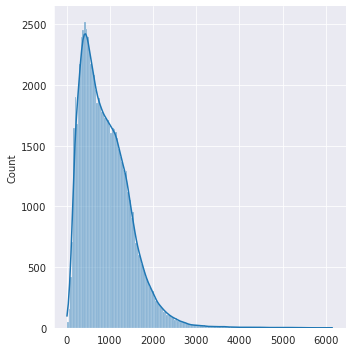

In [6]:
distance=1000/cleandata['Plx']
sns.displot(data=distance,kde=True)

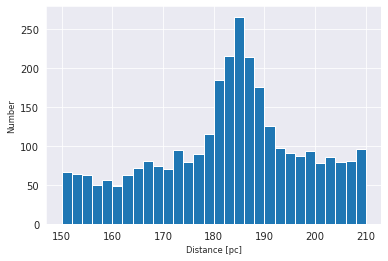

In [7]:
plt.hist(distance,range=(150,210),bins=30)
#sns.displot(data=distance[150:210],kde=True)
plt.xlabel('Distance [pc]',size="small")
plt.ylabel('Number',size="small")
plt.show()

Step 5:  
Plot the proper motion R.A. and Decl. According to Wang(et al., 2014), we get that around the peak of the cluster, the distribution is dominated by members, and away from the peak the contamination by field stars becomes prominent. In fact, Praesepe is among a few cases where the cluster’s motion is clearly separated from that of the field, so the PM distribution exhibits a distinct secondary peak due to the cluster.

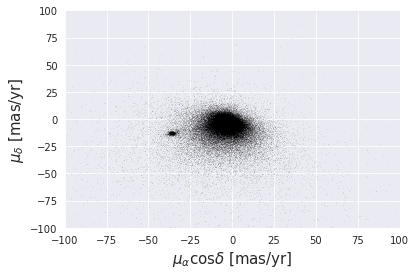

In [8]:
plt.plot(cleandata['pmRA'],cleandata['pmDE'],'.',c='k',ms=.2,mew=.2)
plt.xlabel(r'$\mu_\alpha \cos \delta$ [mas/yr]', fontsize=15, style='normal',family='sans-serif' )
plt.ylabel(r'$\mu_\delta$ [mas/yr]', fontsize=15, style='normal' , family='sans-serif' )
plt.xlim(-100,100)
plt.ylim(-100,100)

plt.show()

# Chapter 2: cluster member selection

After the quality cut in the chapter 1 step 5, we know that the PM distribution has two peaks, one for the cluster (μα cos δ ≈ −35.0 mas yr−1, μδ ≈ −13.0 mas yr−1) and the other for field stars (μα cos δ ≈ −3.0 mas yr−1, μδ ≈ −2.5 mas yr−1). The latter is the reflex Galactic motion of the Sun toward this particular line of sight. Therefore, we chose the former one to find the members of praesepe star cluster.It is reasonabel to use a circular cut to select members within Δμ = 9 mas yr−1 of the cluster’s average PM, that we adopted to select PM membership. The points selected are colored to red.

(-24.0, 0.0)

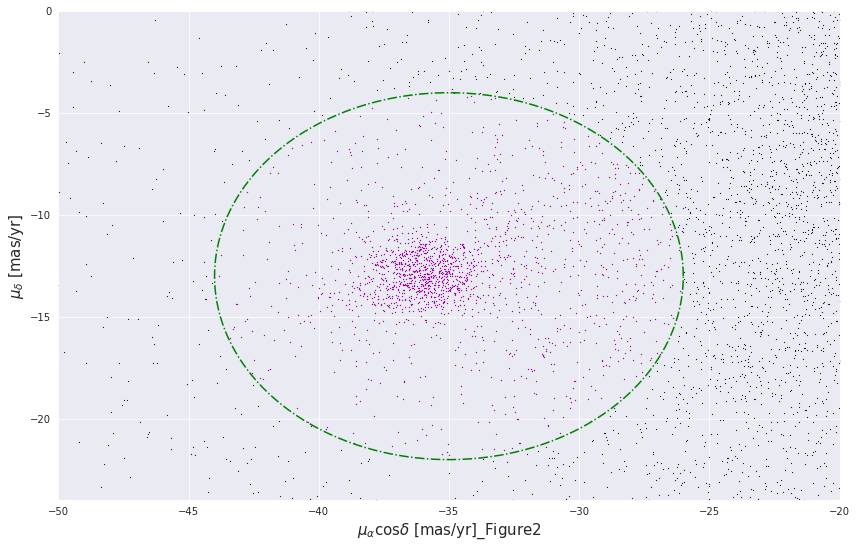

In [9]:
#selection 1: circle cut , within Δμ = 9 mas yr−1 of the cluster’s average PM
Dpass2=np.where((np.power(cleandata['pmRA']+35,2)+np.power(cleandata['pmDE']+13,2))<81)
cleandata2=cleandata[Dpass2]

plt.figure(figsize=(14,9))
plt.plot(cleandata['pmRA'],cleandata['pmDE'],'.',c='k',ms=.8,mew=.8)
plt.plot(cleandata2['pmRA'],cleandata2['pmDE'],'m.',ms=.8,mew=.8)
angle_iter = np.arange(0,2*np.pi,0.01)
a = -35+9*np.cos(angle_iter)
b = -13+9*np.sin(angle_iter)
plt.plot(a,b,color='g',linestyle='-.')
plt.plot(a,-b,color='g',linestyle='-.')
plt.xlabel(r'$\mu_\alpha \cos \delta$ [mas/yr]_Figure2', fontsize=15, style='normal',family='sans-serif' )
plt.ylabel(r'$\mu_\delta$ [mas/yr]', fontsize=15, style='normal' , family='sans-serif' )
plt.xlim(-50,-20)
plt.ylim(-24,0)

The next step is to displays the distance histogram of the proper motion selected stars, we select the stars within 10 pc far away from praesepe, that is we only remain the stars whose distance is between 169pc and 189 pc.

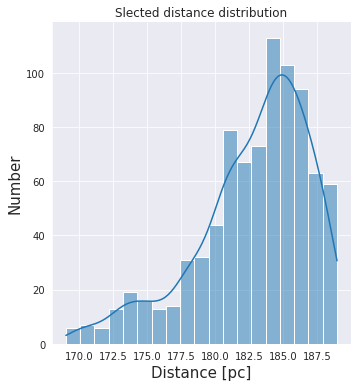

In [10]:
#selection 2 :distance reqirement:. Assuming the distance of Praesepe members at 179 pc. Allowing a radius of 10 pc to select members.
distance=1000/cleandata2['Plx']
Dpass3=np.where((distance>=169) & (distance<=189))
distance_sel=distance[Dpass3]
cleandata3=cleandata2[Dpass3]

sns.displot(distance_sel,kde=True)
plt.title("Slected distance distribution")
plt.xlabel('Distance [pc]',fontsize=15)
plt.ylabel('Number',fontsize=15)

plt.show()

# Chapter 3 – Cluster member properties:

Plot the members on the color magnitude diagram BP_mag – RP_mag vs Gmag


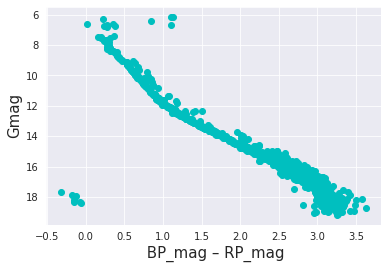

In [11]:
yd=cleandata3['Gmag']
xd=cleandata3['BPmag']-cleandata3['RPmag']
plt.xlabel(" BP_mag – RP_mag",fontsize=15)
plt.ylabel("Gmag",fontsize=15)
plt.gca().invert_yaxis()
plt.scatter(xd,yd,color='c')

It is evident to see a main sequence from the figure blow. In astronomy, the main sequence is a continuous and distinctive band of stars that appears on plots of stellar color versus brightness. These color-magnitude plots are known as Hertzsprung–Russell diagrams after their co-developers, Ejnar Hertzsprung and Henry Norris Russell. Stars on this band are known as main-sequence stars or dwarf stars. These are the most numerous true stars in the universe, and include the Earth's Sun.

find the linear regression line of the points

<AxesSubplot:xlabel='BPmag', ylabel='Gmag'>

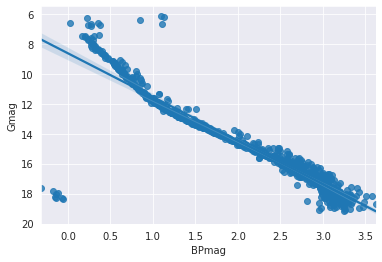

In [12]:
plt.gca().invert_yaxis()
sns.regplot(x=xd,y=yd)